<a href="https://colab.research.google.com/github/nagaraju-urakonda/2125_deep_learning/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''https://www.kaggle.com/datasets/awaiskaggler/insurance-csvLinks to an external site.

Load a dataset and perform the following:
a) Create vectors, factors, lists, matrices, and data frames.
b) Generate a scatter plot. Customize it by adding a title, axis labels, text annotations, and changing the plot characters (e.g., circles to plus signs).
c) Filter the data based on a condition and update the plot to reflect the filtered data.'''

'https://www.kaggle.com/datasets/awaiskaggler/insurance-csvLinks to an external site.\n\nLoad a dataset and perform the following:\na) Create vectors, factors, lists, matrices, and data frames.\nb) Generate a scatter plot. Customize it by adding a title, axis labels, text annotations, and changing the plot characters (e.g., circles to plus signs).\nc) Filter the data based on a condition and update the plot to reflect the filtered data.'

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [7]:
data = pd.read_csv("/content/insurance.csv")

In [27]:


# a) Creating Vectors (using columns from the dataset)
age_vector = data['age'].to_numpy()
sex_vector = data['sex'].to_numpy()
expenses_vector = data['expenses'].to_numpy()

# Displaying Results
print("Vectors:")
print("Age Vector:", age_vector[:5])
print("Sex Vector:", sex_vector[:5])
print("Expenses Vector:", expenses_vector[:5])

Vectors:
Age Vector: [19 18 28 33 32]
Sex Vector: ['female' 'male' 'male' 'male' 'male']
Expenses Vector: [16884.92  1725.55  4449.46 21984.47  3866.86]

List Content Types: ['ndarray', 'ndarray', 'ndarray', 'Categorical']

Matrix Shape: (1338, 3)
First 5 Rows of Matrix:
 [[1.900000e+01 2.790000e+01 1.688492e+04]
 [1.800000e+01 3.380000e+01 1.725550e+03]
 [2.800000e+01 3.300000e+01 4.449460e+03]
 [3.300000e+01 2.270000e+01 2.198447e+04]
 [3.200000e+01 2.890000e+01 3.866860e+03]]

Subset Data Frame:
   age     sex   bmi  expenses
0   19  female  27.9  16884.92
1   18    male  33.8   1725.55
2   28    male  33.0   4449.46
3   33    male  22.7  21984.47
4   32    male  28.9   3866.86


In [28]:
# Creating Factors (categorical encoding for 'sex' and 'smoker')
sex_factor = pd.Categorical(data['sex'])
smoker_factor = pd.Categorical(data['smoker'])


print("\nFactors:")
print("Sex Factor Categories:", sex_factor.categories.tolist())
print("Smoker Factor Categories:", smoker_factor.categories.tolist())


Factors:
Sex Factor Categories: ['female', 'male']
Smoker Factor Categories: ['no', 'yes']


In [29]:

# Creating a List (combining different data types)
data_list = [age_vector, sex_vector, expenses_vector, smoker_factor]

print("\nList Content Types:", [type(item).__name__ for item in data_list])


List Content Types: ['ndarray', 'ndarray', 'ndarray', 'Categorical']


In [30]:
# Creating a Matrix (using numerical columns: 'age', 'bmi', 'expenses')
numerical_matrix = data[['age', 'bmi', 'expenses']].to_numpy()

print("\nMatrix Shape:", numerical_matrix.shape)
print("First 5 Rows of Matrix:\n", numerical_matrix[:5])




Matrix Shape: (1338, 3)
First 5 Rows of Matrix:
 [[1.900000e+01 2.790000e+01 1.688492e+04]
 [1.800000e+01 3.380000e+01 1.725550e+03]
 [2.800000e+01 3.300000e+01 4.449460e+03]
 [3.300000e+01 2.270000e+01 2.198447e+04]
 [3.200000e+01 2.890000e+01 3.866860e+03]]


In [31]:
# Creating a Data Frame (subset of the dataset)
subset_df = data[['age', 'sex', 'bmi', 'expenses']]

print("\nSubset Data Frame:")
print(subset_df.head())



Subset Data Frame:
   age     sex   bmi  expenses
0   19  female  27.9  16884.92
1   18    male  33.8   1725.55
2   28    male  33.0   4449.46
3   33    male  22.7  21984.47
4   32    male  28.9   3866.86


In [32]:
# Encoding 'sex' with replace
data['sex_numeric'] = data['sex'].replace({'male': 1, 'female': 0})

# Encoding 'smoker' with replace
data['smoker_numeric'] = data['smoker'].replace({'yes': 1, 'no': 0})

# Encoding 'region' with replace (assigning arbitrary numbers)
region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
data['region_numeric'] = data['region'].replace(region_mapping)

# Display the updated dataset
print(data[['sex', 'sex_numeric', 'smoker', 'smoker_numeric', 'region', 'region_numeric']].head())


      sex  sex_numeric smoker  smoker_numeric     region  region_numeric
0  female            0    yes               1  southwest               0
1    male            1     no               0  southeast               1
2    male            1     no               0  southeast               1
3    male            1     no               0  northwest               2
4    male            1     no               0  northwest               2


<ipython-input-32-4f1f26af61a9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex_numeric'] = data['sex'].replace({'male': 1, 'female': 0})
<ipython-input-32-4f1f26af61a9>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoker_numeric'] = data['smoker'].replace({'yes': 1, 'no': 0})
<ipython-input-32-4f1f26af61a9>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the f

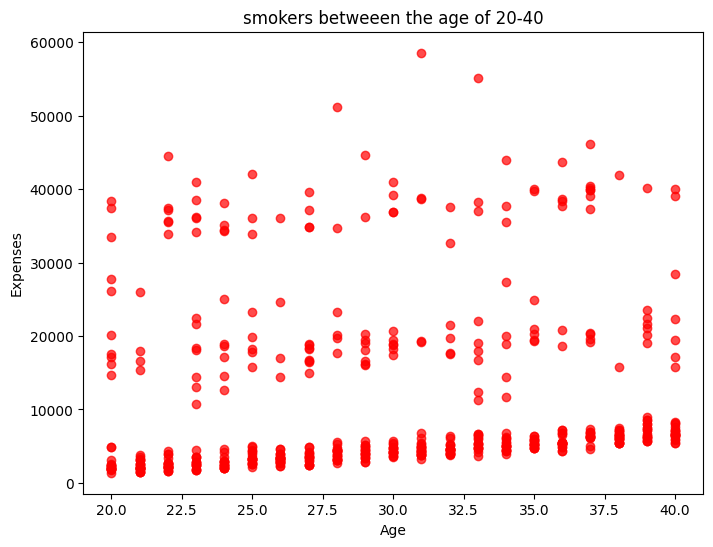

In [39]:
filtered_data = data[(data['age'] >= 20) & (data['age'] <= 40)]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['age'], filtered_data['expenses'], color='red', alpha=0.7)
plt.title('smokers betweeen the age of 20-40')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.show()


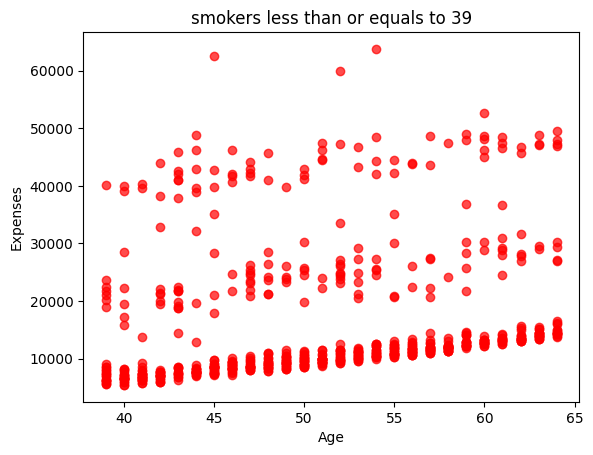

In [41]:
filtered_data = data[(data['age'] <= 39)]

# Scatter plot
plt.scatter(filtered_data['age'], filtered_data['expenses'], color='red', alpha=0.7)
plt.title('smokers less than or equals to 39')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.show()


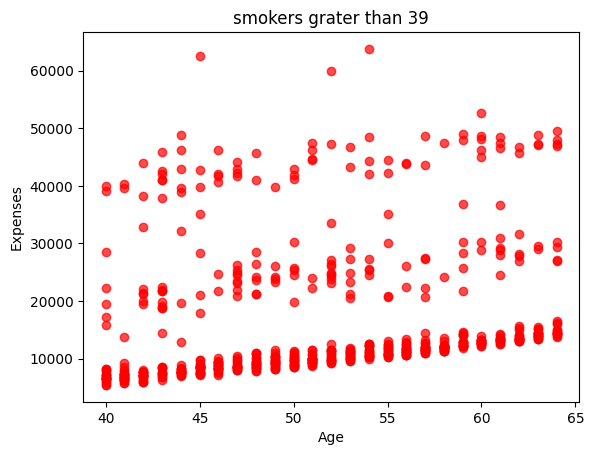

In [43]:
filtered_data = data[(data['age'] > 39)]

# Scatter plot
plt.scatter(filtered_data['age'], filtered_data['expenses'], color='red', alpha=0.7)
plt.title('smokers grater than 39')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.show()
